<img src="./IMTA.png" alt="Logo IMT Atlantique" width="300"/>

##  **Introduction à PyTorch/MONAI - Structuration d’un projet de Deep Learning**
## TAF Health - UE B - 2025/2026 

Pierre-Henri.Conze@imt-atlantique.fr - Vincent.Jaouen@imt-atlantique.fr


# 01 — Segmentation

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
import torch

In [2]:
import yaml
with open("../configs/segmentation.yaml") as f:
    cfg = yaml.safe_load(f)

from utils.training import train_segmentation
from utils.data_utils import get_seg2d_dataloaders
from utils.vis_utils import show_overlay

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
train_loader, val_loader = get_seg2d_dataloaders(
    data_dir=cfg["data"]["data_dir"],
    batch_size=cfg["data"]["batch_size"],
    target_size=tuple(cfg["data"]["target_size"]),
    val_fraction=cfg["data"]["val_fraction"],
)

Loading dataset: 100%|██████████| 3/3 [00:00<00:00, 191.25it/s]


Epoch 1/20


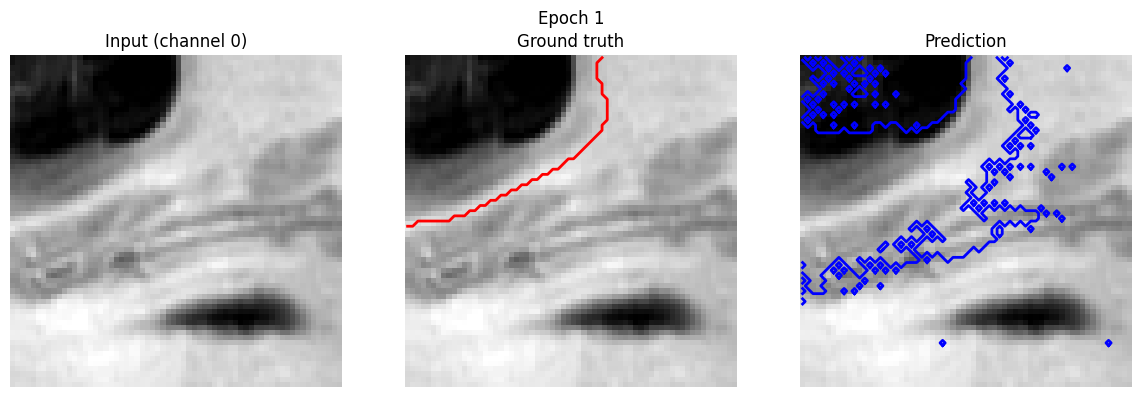

  Loss: 1.2465, Val Dice: 0.7063
Epoch 2/20


KeyboardInterrupt: 

In [3]:
from utils.model_utils import model_factory
from monai.losses import DiceCELoss
from monai.metrics import DiceMetric

model = model_factory(cfg["model"]).to(device)
loss_fn = DiceCELoss(sigmoid=True, to_onehot_y=False)
dice_metric = DiceMetric(include_background=True, reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

train_losses, val_dices, best_dice, best_weights = train_segmentation(
    model, train_loader, val_loader,
    loss_fn, dice_metric, optimizer,
    device=device, max_epochs=cfg["training"]["max_epochs"],
    overlay_fn=show_overlay
)

In [ ]:
from utils.evaluation import evaluate_segmentation

model.load_state_dict(best_weights)
evaluate_segmentation(model, val_loader, device=device, max_examples=6)